# Exploratory Data Analysis of tweets

In [1]:
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns

In [2]:
tweets = pd.read_csv("./data_cleaned/webscraped_WEYERHAEUSER_CO.csv/part-00000-17a4305d-9672-4ddf-87fc-d180dcf01612-c000.csv")

## Wordclouds per year

In [3]:
# creation of masks for ploting specific wordclouds per year
mask_2022 = pd.to_datetime(tweets['PostDate']).dt.year == 2022
mask_2021 = pd.to_datetime(tweets['PostDate']).dt.year == 2021
mask_2020 = pd.to_datetime(tweets['PostDate']).dt.year == 2020
mask_2019 = pd.to_datetime(tweets['PostDate']).dt.year == 2019
mask_2018 = pd.to_datetime(tweets['PostDate']).dt.year == 2018
mask_2017 = pd.to_datetime(tweets['PostDate']).dt.year == 2017

In [4]:
# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/sarrabenyahia/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/share/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


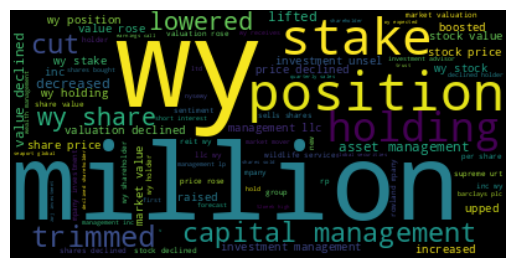

In [ ]:
# we select all the tweets from 2017 to 2022
tweet_list = tweets["TweetText"].tolist()
# join all tweets into a single string
tweet_string = ' '.join(tweet_list)
# we have decided to remove the name of the company because is our keyword
tweet_string = tweet_string.replace("weyerhaeuser", "").replace("co", "")
# create the word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(tweet_string)
# show the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

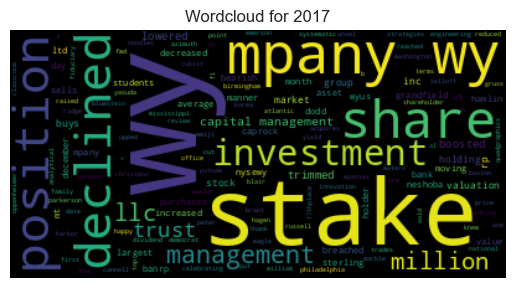

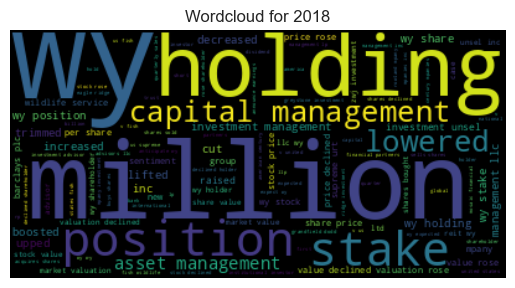

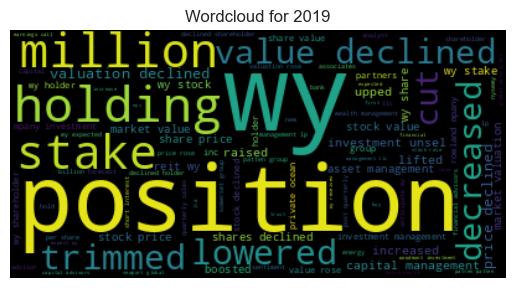

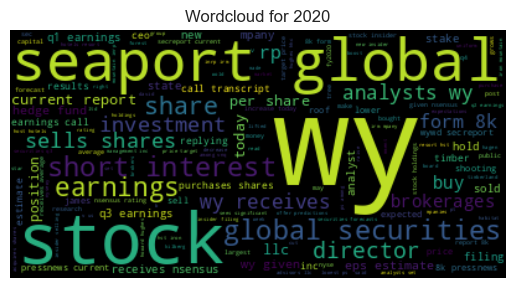

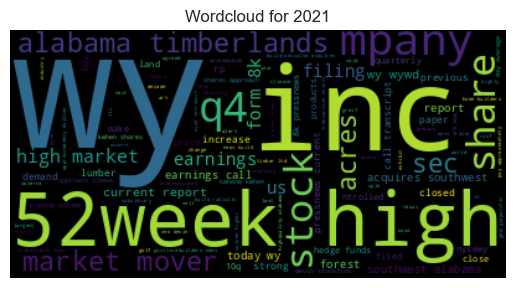

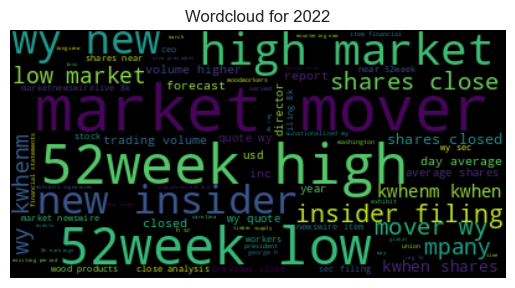

In [ ]:
# we select all the tweets from 2017 to 2022
years = [2017,2018,2019,2020,2021,2022]
masks = [mask_2017, mask_2018, mask_2019, mask_2020, mask_2021, mask_2022]

for year, mask in zip(years, masks):
    tweet_list = tweets.loc[mask,"TweetText"].tolist()
    # join all tweets into a single string
    tweet_string = ' '.join(tweet_list)
    # we have decided to remove the name of the company because is our keyword
    tweet_string = tweet_string.replace("weyerhaeuser", "").replace("co", "")
    # create the word cloud
    wordcloud = WordCloud(stopwords=stop_words).generate(tweet_string)
    # show the word cloud
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {year}")
    plt.show()

In [24]:
from PIL import Image #importing Image module from PIL package

# We import the twitter logo as a mask
twitter_logo = Image.open("twitter_logo.png")

# we select all the tweets from 2017 to 2022
years = [2017,2018,2019,2020,2021,2022]
masks = [mask_2017, mask_2018, mask_2019, mask_2020, mask_2021, mask_2022]

for year, mask in zip(years, masks):
    tweet_list = tweets.loc[mask,"TweetText"].tolist()
    # join all tweets into a single string
    tweet_string = ' '.join(tweet_list)
    # we have decided to remove the name of the company because is our keyword
    tweet_string = tweet_string.replace("weyerhaeuser", "").replace("co", "")
    # create the word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", mask=twitter_logo, contour_width=3, contour_color='black').generate(tweet_string)
    # show the word cloud
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {year}")
    plt.show()


AttributeError: 'list' object has no attribute 'loc'

## Tweet Length

In [ ]:
# we add a column with the length of each tweet
tweets['tweet_length'] = tweets['TweetText'].apply(lambda x : len(x.split()))

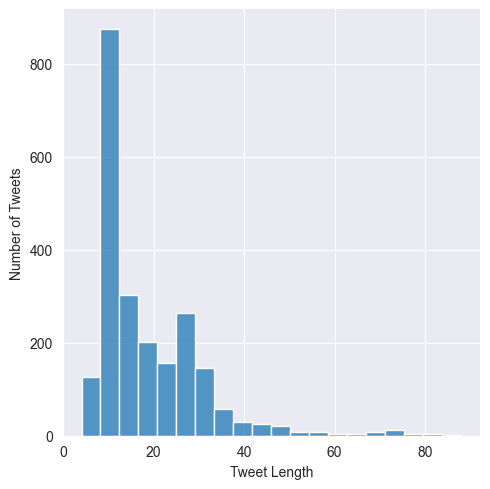

In [ ]:
sns.set_style("darkgrid")
sns.displot(tweets['tweet_length'], bins=20 )
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.show()

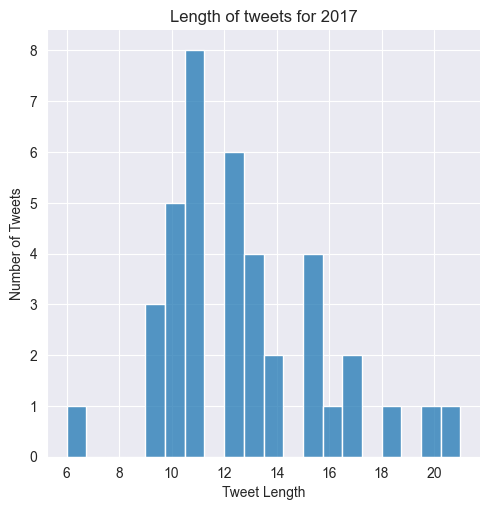

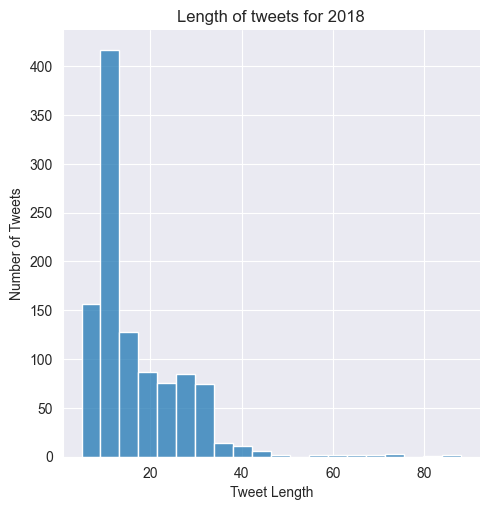

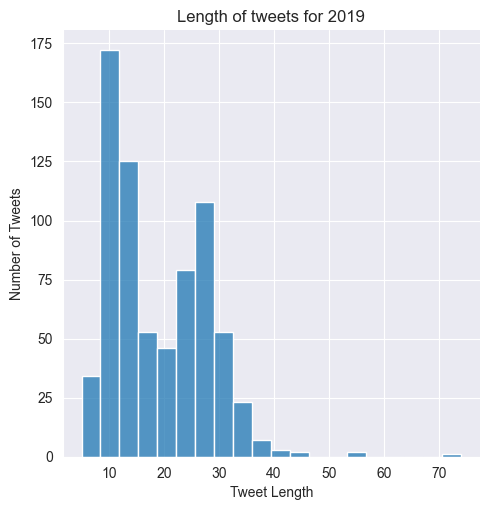

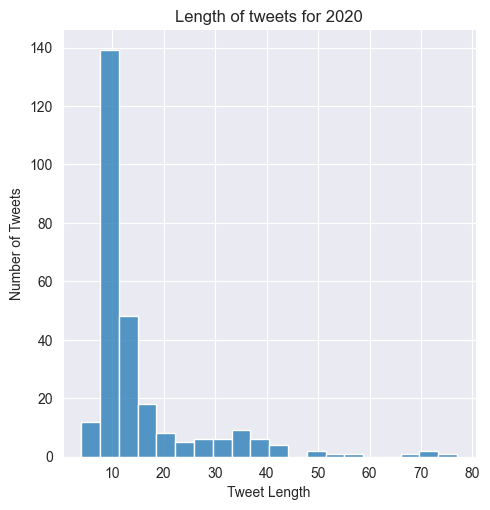

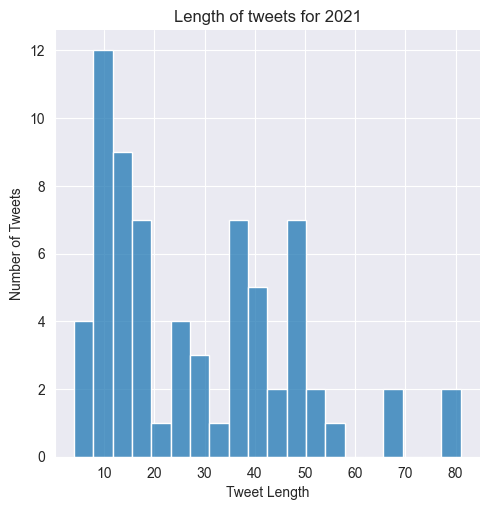

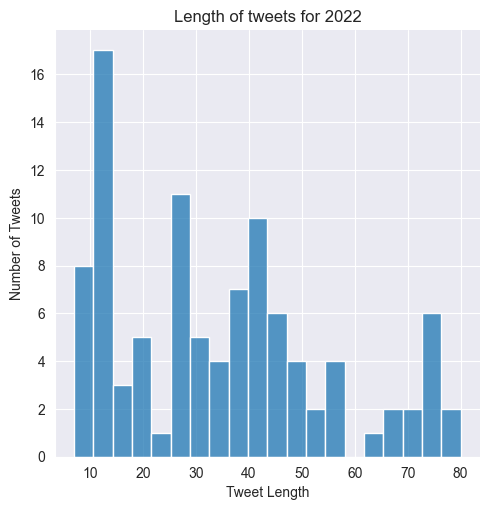

In [ ]:
years = [2017,2018,2019,2020,2021,2022]
masks = [mask_2017, mask_2018, mask_2019, mask_2020, mask_2021, mask_2022]

for year, mask in zip(years, masks):
    sns.set_style("darkgrid")
    sns.displot(tweets.loc[mask,'tweet_length'], bins=20)
    plt.title(f"Length of tweets for {year}")
    plt.xlabel('Tweet Length')
    plt.ylabel('Number of Tweets')
    plt.show()

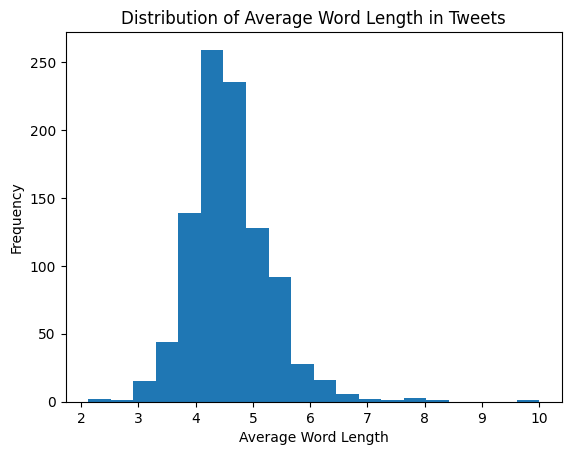

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



# calculate the average word length for each tweet
df["avg_word_length"] = df["TweetText"].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# create the histogram
plt.hist(df["avg_word_length"], bins=20)
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Average Word Length in Tweets")
plt.show()


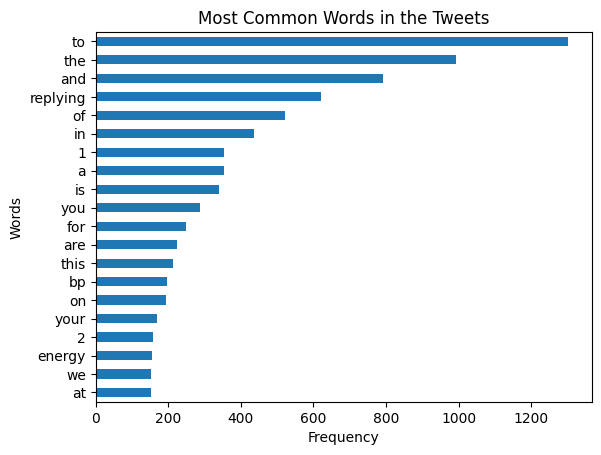

In [13]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a list of all the words in the column 'TweetText'
all_words = ' '.join(df['TweetText'])

# Split the list into individual words
words = all_words.split()

# Use the pandas method 'value_counts' to get the frequency of each word
word_freq = pd.Series(words).value_counts()

# Plot the top 20 most common words
word_freq[:20].sort_values(ascending=True).plot.barh()

# Add a title and labels
plt.title("Most Common Words in the Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")

# Show the plot
plt.show()


In [17]:
# Create a list of all the tweets
tweets = df["TweetText"].tolist()

# Perform text pre-processing
nltk.download('punkt')
tweets = [nltk.word_tokenize(tweet) for tweet in tweets]

# Create a frequency distribution of the words
fdist = FreqDist(word for tweet in tweets for word in tweet)

# Plot the most common words
fdist.plot(30, cumulative=False)
plt.show()


NameError: name 'nltk' is not defined

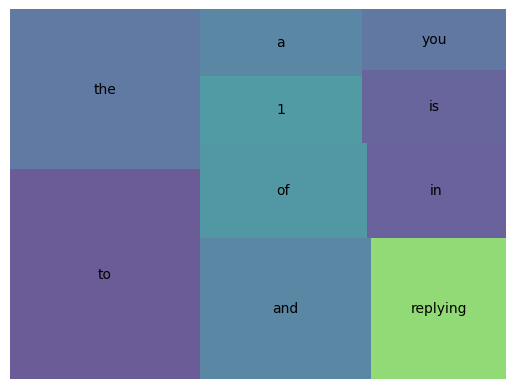

In [18]:
import squarify
import matplotlib.pyplot as plt
from collections import Counter

# assuming your dataframe is named 'df' and the column with the tweets is named 'TweetText'
tweet_text = df['TweetText'].str.cat(sep=' ')

# get the top 10 most common words
common_words = Counter(tweet_text.split()).most_common(10)

# create the treemap
squarify.plot(sizes=[count for word, count in common_words], label=[word for word, count in common_words], alpha=.8 )
plt.axis('off')
plt.show()


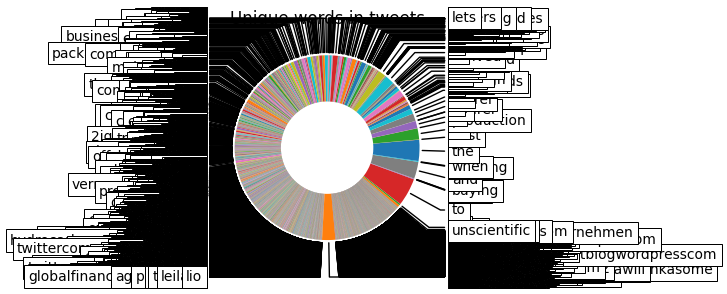

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np


# Create a list of all the words in the column
all_words = ' '.join(df['TweetText']).split()

# Count the number of occurrences of each word
word_counts = Counter(all_words)

# Get the unique words and their counts
unique_words = dict(word_counts)

# Plot the donut chart
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = list(unique_words.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(unique_words.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Unique words in tweets")

plt.show()
